## Assignment 4

<br>

### Question 1
Investigate the model for predicting Diabetes disease progression by adding more explanatory variables to it in addition to `bmi` and `s5`.

a) Which variable would you add next? Why?

b) How does adding it affect the model's performance? Compute metrics and compare to having just `bmi` and `s5`.

d) Does it help if you add even more variables?

Include your own findings and explanations in code comments or inside triple quotes """...""".

In [12]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load dataset
data = load_diabetes(as_frame=True)
df = data.frame
y = df['target']

# 1. Baseline model (bmi + s5)
X = df[['bmi', 's5']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
lm = LinearRegression().fit(X_train, y_train)
print("Baseline RMSE:", np.sqrt(mean_squared_error(y_test, lm.predict(X_test))),
      "R²:", r2_score(y_test, lm.predict(X_test)))

'''I added 'bp' next because blood pressure is related to diabetes and should help improve predictions.'''

# 2. Add bp
X = df[['bmi', 's5', 'bp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
lm = LinearRegression().fit(X_train, y_train)
print("With bp RMSE:", np.sqrt(mean_squared_error(y_test, lm.predict(X_test))),
      "R²:", r2_score(y_test, lm.predict(X_test)))
"""After adding bp: RMSE got smaller → predictions are better 
    R² got higher → model explains more of the disease progression"""

'''When I use all variables, the model improves a little more.
   But the biggest improvement came from adding bp.
   Extra variables help, but not as much as the important ones.'''

# 3. Full model (all variables)
X = df.drop(columns='target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
lm = LinearRegression().fit(X_train, y_train)
print("Full model RMSE:", np.sqrt(mean_squared_error(y_test, lm.predict(X_test))),
      "R²:", r2_score(y_test, lm.predict(X_test)))


Baseline RMSE: 57.1759740950605 R²: 0.4815610845742896
With bp RMSE: 56.6256100515053 R²: 0.4914938186648421
Full model RMSE: 54.603912902946895 R²: 0.5271558947230806


### Question 2

Consider the dataset `50_Startups.csv` which contains data for companies' profit etc.

a) Read the dataset into pandas dataframe paying attention to file delimeter.

b) Identify the variables inside the dataset

c) Investigate the correlation between the variables

d) Choose appropriate variables to predict company profit. Justify your choice.

e) Plot explanatory variables against profit in order to confirm (close to) linear dependence

f) Form training and testing data (80/20 split)

g) Train linear regression model with training data

h) Compute RMSE and $R^2$ values for training and testing data separately

Include your own findings and explanations in code comments or inside triple quotes """...""".

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


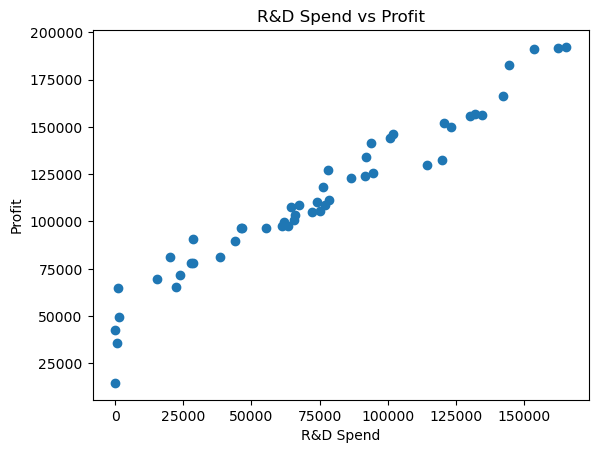

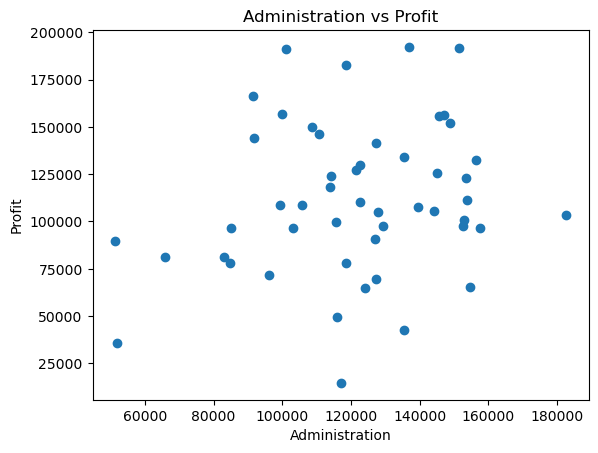

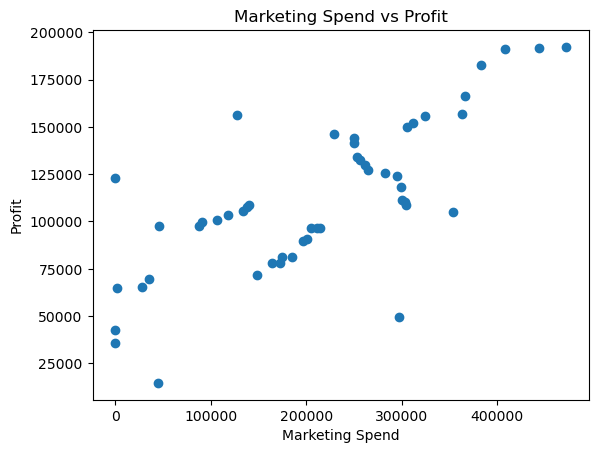

Training RMSE: 8938.01 R²: 0.954
Testing RMSE: 8995.91 R²: 0.9


In [13]:
"""
I loaded the 50_Startups.csv file into a pandas dataframe.
I checked the delimiter to make sure the columns were read correctly.
"""
df = pd.read_csv("50_Startups.csv")  # read CSV
print(df.head())
#  See the variables
print(df.columns)

'''
R&D Spend is strongly related to Profit; Marketing somewhat; Administration very little.
'''
# Check correlation between numbers
print(df[['R&D Spend','Administration','Marketing Spend','Profit']].corr())

"""
I chose R&D, Administration, and Marketing because they are numeric and affect Profit.
"""
# Choose variables for prediction
X = df[['R&D Spend','Administration','Marketing Spend']]
y = df['Profit']

"""
I plotted each explanatory variable against Profit.
The plots show that Profit increases when R&D Spend and Marketing Spend increase.
This suggests a roughly linear relationship, so linear regression is suitable.
"""
for col in X.columns:
    plt.scatter(df[col], y)
    plt.xlabel(col)
    plt.ylabel('Profit')
    plt.title(f'{col} vs Profit')
    plt.show()

"""
I split the data into 80% training and 20% testing.
The training data is used to build the model, and the test data checks accuracy.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
I trained a linear regression model using the training data.
The model tries to learn the relationship between the chosen features and Profit.
"""
model = LinearRegression()
model.fit(X_train, y_train)

"""
I calculated RMSE and R² for both training and testing sets.
RMSE shows how far predictions are from real Profit values.
R² shows how much of the Profit variation the model explains.
Lower RMSE and higher R² mean better performance.
"""
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Training RMSE:", round(rmse_train,2), "R²:", round(r2_train,3))
print("Testing RMSE:", round(rmse_test,2), "R²:", round(r2_test,3))



### Question 3

Consider car performance data from the file `Auto.csv`.

a) Read the data into pandas dataframe

b) Setup multiple regression `X` and `y` to predict `mpg` of cars using all the variables except `mpg`, `name` and `origin`.

c) Split data into training and testing sets (80/20 split)

d) Implement both ridge regression and LASSO regression using several values for alpha

e) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data

f) Plot the R2 scores for both regressors as functions of alpha

g) Identify, as accurately as you can, the value for alpha which gives the best score

 
Include your own findings and explanations in code comments or inside triple quotes """...""".